## Python Laboratorinis Darbas Nr. 12: Klasės ir objektai

<a href="https://colab.research.google.com/github/uqglmn/pylab/blob/main/Py_Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Užduotis

[Sierpiński trikampis](https://en.wikipedia.org/wiki/Sierpi\%C5\%84ski\_triangle) yra fraktalinė aibė turinti lygiakraščio trikampio, rekursyviai padalinto į mažesnius lygiakraščius trikampius, formą. Ši aibė pavadinta lenkų matematiko Wacławo Sierpińskio vardu, tačiau, kaip dekoratyvinis raštas, žinoma daugelį amžių anksčiau.

<img src="https://raw.githubusercontent.com/uqglmn/pylab/main/figures/sierpinski.png" width=350 />

Sierpiński aibę galima aproksimuoti tokiu algoritmu:

1. Pasirinktie tris taškus plokštumoje: $p_1$, $p_2$ ir $p_3$. Jie bus trikampio viršūnės.
 
2. Pasirinkite atsitiktinį tašką trikampio viduje. Pavyzdžiui, raskite vidurio taška $v_1$ tarp bet kurių dviejų trikampio viršūnių. Pavadinkite šį tašką ``pradžia''.

3. Atsitiktiniu būdų pasirinkite vieną iš trijų trikampio višūnių, $p_{r_1}$, kur $r_1\in \{1, 2, 3\}$, ir pavadinkite ją ``pabaiga''.

4. Suraskite vidurio tašką $v_2$ tarp pradžios ir pabaigos, t.y. $v_2 = \frac12(v_1 + p_{r_1})$.

5. Kartokite 3 ir 4 žingsnius.

Gauta seka

$
v_1,\;\; v_2 =  \tfrac12(v_1 + p_{r_1}),\;\; v_3 =  \tfrac12(v_2 + p_{r_2}) , \;\; \ldots, \;\; v_{\infty},
$

kur $r_1, r_2, \ldots \in \{ 1, 2, 3\}$ yra atsitiktinai parinkti, tankiai užpildo Sierpiński aibę.

### Žingsnis 0: Bibliotekų įkėlimas

Įkelkite reikiamas bibliotekas:

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Žingsnis 1: Klasės aprašymas

Aprašykite klasę ``koord`` turinčią du kintamuosius, ``x`` ir ``y``, ir metodą ``vidurys()``, kuris suranda vidurio tašką tarp dviejų ``koord`` tipo taškų ir rezultatą gražina ``koord`` tipo objektu. Klasė ``koord`` turi būti aprašyta taip, kad žemiau pateiktas kodas atspausdintų ``(1.5,3.0)``:

```python
A = koord(0,0)   # A.x = 0, A.y = 0
B = koord(3,6)   # B.x = 3, B.y = 6
C = A.vidurys(B) # C.x = 1.5, C.y = 3 
print(C)         # atspausdina (1.5, 3.0)
```

In [2]:
# 1.1. Sukurkite naują klasę "koord" ("koordinate"), kuri priima du argumentus, x ir y, 
# ir sukuria naują objektą su tomis vertemis. 
# Panaudokite __init__ metoda.

class koord():
    def __init__(self,x,y):
        self.x = x
        self.y = y

# 1.2. Parašykite metodą tokį, kad spausdinant print(koord), būtų atspausdinti x ir y

    def __str__(self):
        return f"({self.x},{self.y})"

# 1.3. Parašykite metodą atstumo tarp dviejų koordinačių (kaip objektų) suradimui. 
# Pavyzdžiui, jei koord1 ir koord2 yra "koord" tipo objektai, atstumas turi būti suradamas taip:
# atstumas = koord1.atstumas(koord2)

    def atstumas(self, other):
        x_diff_sq = (self.x-other.x)**2
        y_diff_sq = (self.y-other.y)**2
        return (x_diff_sq + y_diff_sq)**0.5

# 1.4. Parašykite metodą vidurio taškui tarp dviejų koordinacių (kaip objektų) suradimui. 
# Vidurio taskas taip pat turi buti "koord" tipo objektas: vidurys = koord1.vidurys(koord2)

    def vidurys(self, other):
        x = (self.x+other.x) / 2
        y = (self.y+other.y) / 2
        return koord(x, y)

In [3]:
# Klasės testas

A = koord(0,0)   # sukuriame "koord" objektą A tokį, kad A.x = 0, A.y = 0
B = koord(3,6)   # sukuriame "koord" objektą B tokį, kad B.x = 3, B.y = 6
C = A.vidurys(B) # grąžina "koord" objektą C tokį, kad C.x = 1.5, C.y = 3 
print(C)

(1.5,3.0)


### Žingsnis 2: Sierpiński aibės generavimas 

Suraskite 1000 sekos narių ir atvaizduokite juos grafiškai. Atvaizdavimą animuokite po kiekvieno taško piešimo sustabdant programos vykdymą daliai sekundės. 

In [4]:
# 2.1. Sukurkite tris koordinates naudojant prieš tai aprašytą klasę.
# Parinkite, kad taškai būtų lygiašonio trikampio kampuose.
# Sudėkite šiuos taškus į viršūnių sąrašą "virsunes"

p1 = koord(0,0)
p2 = koord(3,6)
p3 = koord(6,0)
virsunes = [p1, p2, p3]

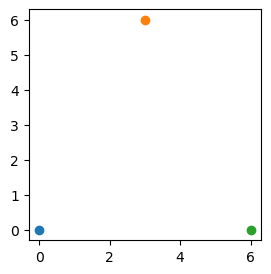

In [5]:
# 2.2. Nupieškite viršūnes

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(p1.x, p1.y)
ax.scatter(p2.x, p2.y)
ax.scatter(p3.x, p3.y)
plt.show()

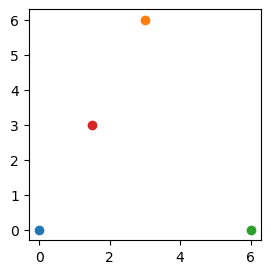

In [6]:
# 2.3. Pasirinkite dvi iš trijų viršūnių. Tai bus jūsų pradžios ir pabaigos taškai.
# Suraskite vidurio tašką ir nupieškite visus keturis turimus taškus

pradzia = p1
pabaiga = p2
vidurys = pradzia.vidurys(pabaiga)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(p1.x, p1.y)
ax.scatter(p2.x, p2.y)
ax.scatter(p3.x, p3.y)
ax.scatter(vidurys.x, vidurys.y)
plt.show()

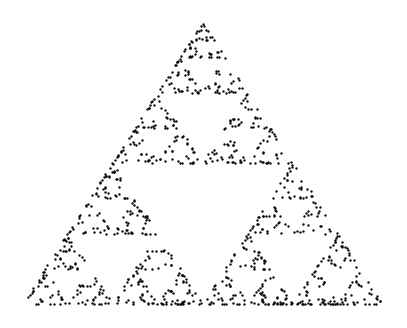

In [7]:
# 2.4. Kartodami 3 ir 4 algoritmo žingsnius suraskite 1000 sekos narių. 
# Jums reikia sukurtis tuščius x ir y sąrašus ir juos užpildyti aibės taškų koordinatėmis
# Gautą aibę atvaizduokita

# Taškų skaičius
N = 1000
x, y = [], []

# Aibės generavimas
for i in range(N):
    vidurys = pradzia.vidurys(pabaiga)
    x.append(vidurys.x)
    y.append(vidurys.y)
    pradzia = vidurys
    pabaiga = random.choice(virsunes)
    
# Aibės atvaizdavimas    
plt.subplots(figsize=(5,4))
plt.scatter(x, y, c='k', s=0.5)
plt.axis('off')
plt.show()

In [8]:
# 2.5. Animacija pagal: https://matplotlib.org/stable/users/explain/animations/animations.html

# Pirmas kadras
fig, ax = plt.subplots(figsize=(4,3))
scat = ax.scatter(x[0], y[0], c="k", s=0.5)
ax.set(xlim=[0, 6], ylim=[0, 6])
plt.axis('off')

# Kadro atnaujinimas
def update(frame):
    # for each frame, update the data stored on each artist.
    x_frame = x[:frame]
    y_frame = y[:frame]
    # update the scatter plot:
    data = np.stack([x_frame, y_frame]).T
    scat.set_offsets(data)
    # update the line plot:
    return scat

# Animacijos metodas
ani = animation.FuncAnimation(fig=fig, func=update, frames=N, interval=50)

plt.close()

In [9]:
# Animacijos generavimas (lėtas procesas!)

from IPython.display import HTML
HTML(ani.to_html5_video())

### Žingsnis 3: Modifikavimas

Padidinkite sekos narių skaičių iki 10000. Parinkite taškus ``p1``, ``p2`` ir ``p3`` taip, kad gautumėte įdomesnės formos trikampį.

In [10]:
# Vieta jūsų kūrybai

